# Importing Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.figure_factory as ff

from pandas_datareader import data
from scipy import stats
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import FixedFormatter, FixedLocator


# Data Exploration

In [2]:
prices_train = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
cm = sns.light_palette("green", as_cmap=True)
prices_train.head(30).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.050000,235.950000,230.200000,233.500000,233.750000,3069914,7162.350000
1,2018-09-27,234.550000,236.800000,231.100000,233.800000,233.250000,5082859,11859.950000
2,2018-09-26,240.000000,240.000000,232.500000,235.000000,234.250000,2240909,5248.600000
3,2018-09-25,233.300000,236.750000,232.000000,236.250000,236.100000,2349368,5503.900000
4,2018-09-24,233.550000,239.200000,230.750000,234.000000,233.300000,3423509,7999.550000
5,2018-09-21,235.000000,237.000000,227.950000,233.750000,234.600000,5395319,12589.590000
6,2018-09-19,235.950000,237.200000,233.450000,234.600000,234.900000,1362058,3202.780000
7,2018-09-18,237.900000,239.250000,233.500000,235.500000,235.050000,2614794,6163.700000
8,2018-09-17,233.150000,238.000000,230.250000,236.400000,236.600000,3170894,7445.410000
9,2018-09-14,223.450000,236.700000,223.300000,234.000000,233.950000,6377909,14784.500000


In [3]:
pd.DataFrame(prices_train.columns, columns=["name"])

,name
0,Date
1,Open
2,High
3,Low
4,Last
5,Close
6,Total Trade Quantity
7,Turnover (Lacs)


In [5]:
# Importing the training set
dataset_train = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data Processing

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 20s 141ms/step - loss: 0.0096
Epoch 2/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0036
Epoch 3/100
62/62 [==============================] - 9s 141ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 8s 131ms/step - loss: 0.0023
Epoch 6/100
62/62 [==============================] - 8s 136ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 9s 139ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 9s 139ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 8s 137ms/step - loss: 0.0017
Epoch 13/100

In [16]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


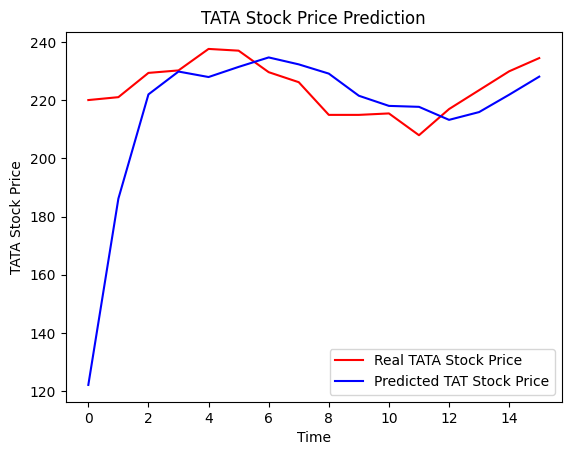

In [18]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [19]:
prices_train = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
cm = sns.light_palette("green", as_cmap=True)
prices_train.head(30).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.050000,235.950000,230.200000,233.500000,233.750000,3069914,7162.350000
1,2018-09-27,234.550000,236.800000,231.100000,233.800000,233.250000,5082859,11859.950000
2,2018-09-26,240.000000,240.000000,232.500000,235.000000,234.250000,2240909,5248.600000
3,2018-09-25,233.300000,236.750000,232.000000,236.250000,236.100000,2349368,5503.900000
4,2018-09-24,233.550000,239.200000,230.750000,234.000000,233.300000,3423509,7999.550000
5,2018-09-21,235.000000,237.000000,227.950000,233.750000,234.600000,5395319,12589.590000
6,2018-09-19,235.950000,237.200000,233.450000,234.600000,234.900000,1362058,3202.780000
7,2018-09-18,237.900000,239.250000,233.500000,235.500000,235.050000,2614794,6163.700000
8,2018-09-17,233.150000,238.000000,230.250000,236.400000,236.600000,3170894,7445.410000
9,2018-09-14,223.450000,236.700000,223.300000,234.000000,233.950000,6377909,14784.500000


In [24]:
fig = px.bar(prices_train, x='Date', y='Turnover (Lacs)')
fig.update_layout(title=f'TATA stock price', barmode='stack', font_color="black")
fig.show()

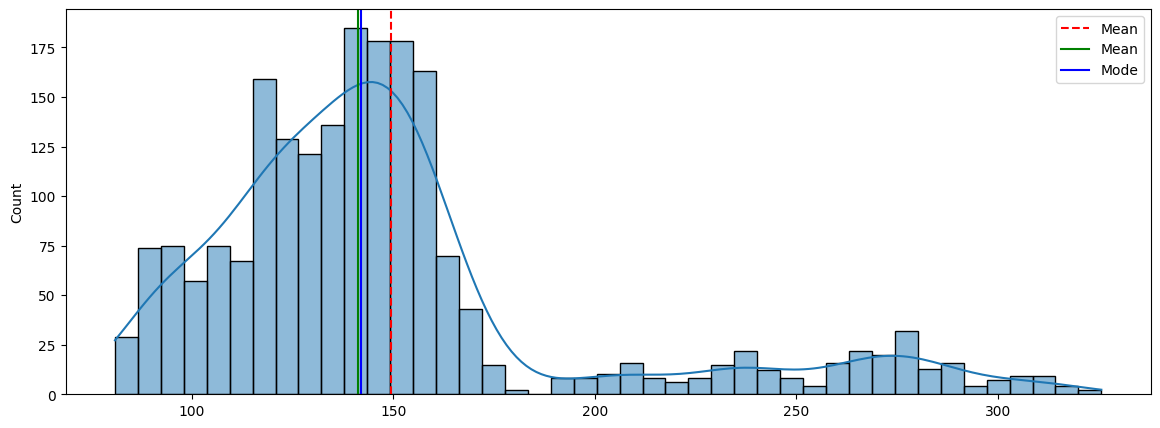

In [25]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
v_dist_1 = prices_train["Close"].values
sns.histplot(v_dist_1, ax=ax1, kde=True)
mean=prices_train["Close"].mean()
median=prices_train["Close"].median()
mode=prices_train["Close"].mode().values[0]
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()

# **Monte Carlo Simulation**

In [26]:
days_prev_len = 20

prices_train_copy = prices_train["Close"]
print(f"Before: {len(prices_train_copy)}")

prices_train_copy = prices_train_copy[0: len(prices_train_copy) - days_prev_len]
prices_test_copy = prices_train_copy[len(prices_train_copy) - days_prev_len:]
print(f"After: {len(prices_train_copy)}")
print(f"Test dt: {len(prices_test_copy)}")

Before: 2035
After: 2015
Test dt: 20


In [27]:
prices_train_copy = np.log(1 + prices_train_copy.pct_change())
prices_train_copy.fillna(0, inplace=True)
prices_train_copy

0       0.000000
1      -0.002141
2       0.004278
3       0.007867
4      -0.011930
          ...   
2010   -0.004712
2011    0.002145
2012   -0.045582
2013    0.013806
2014   -0.037859
Name: Close, Length: 2015, dtype: float64

In [28]:
drift = prices_train_copy.mean() - (0.5 * prices_train_copy.var())
print(f"Drift: {drift}")

Drift: -0.0005905499298550223


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



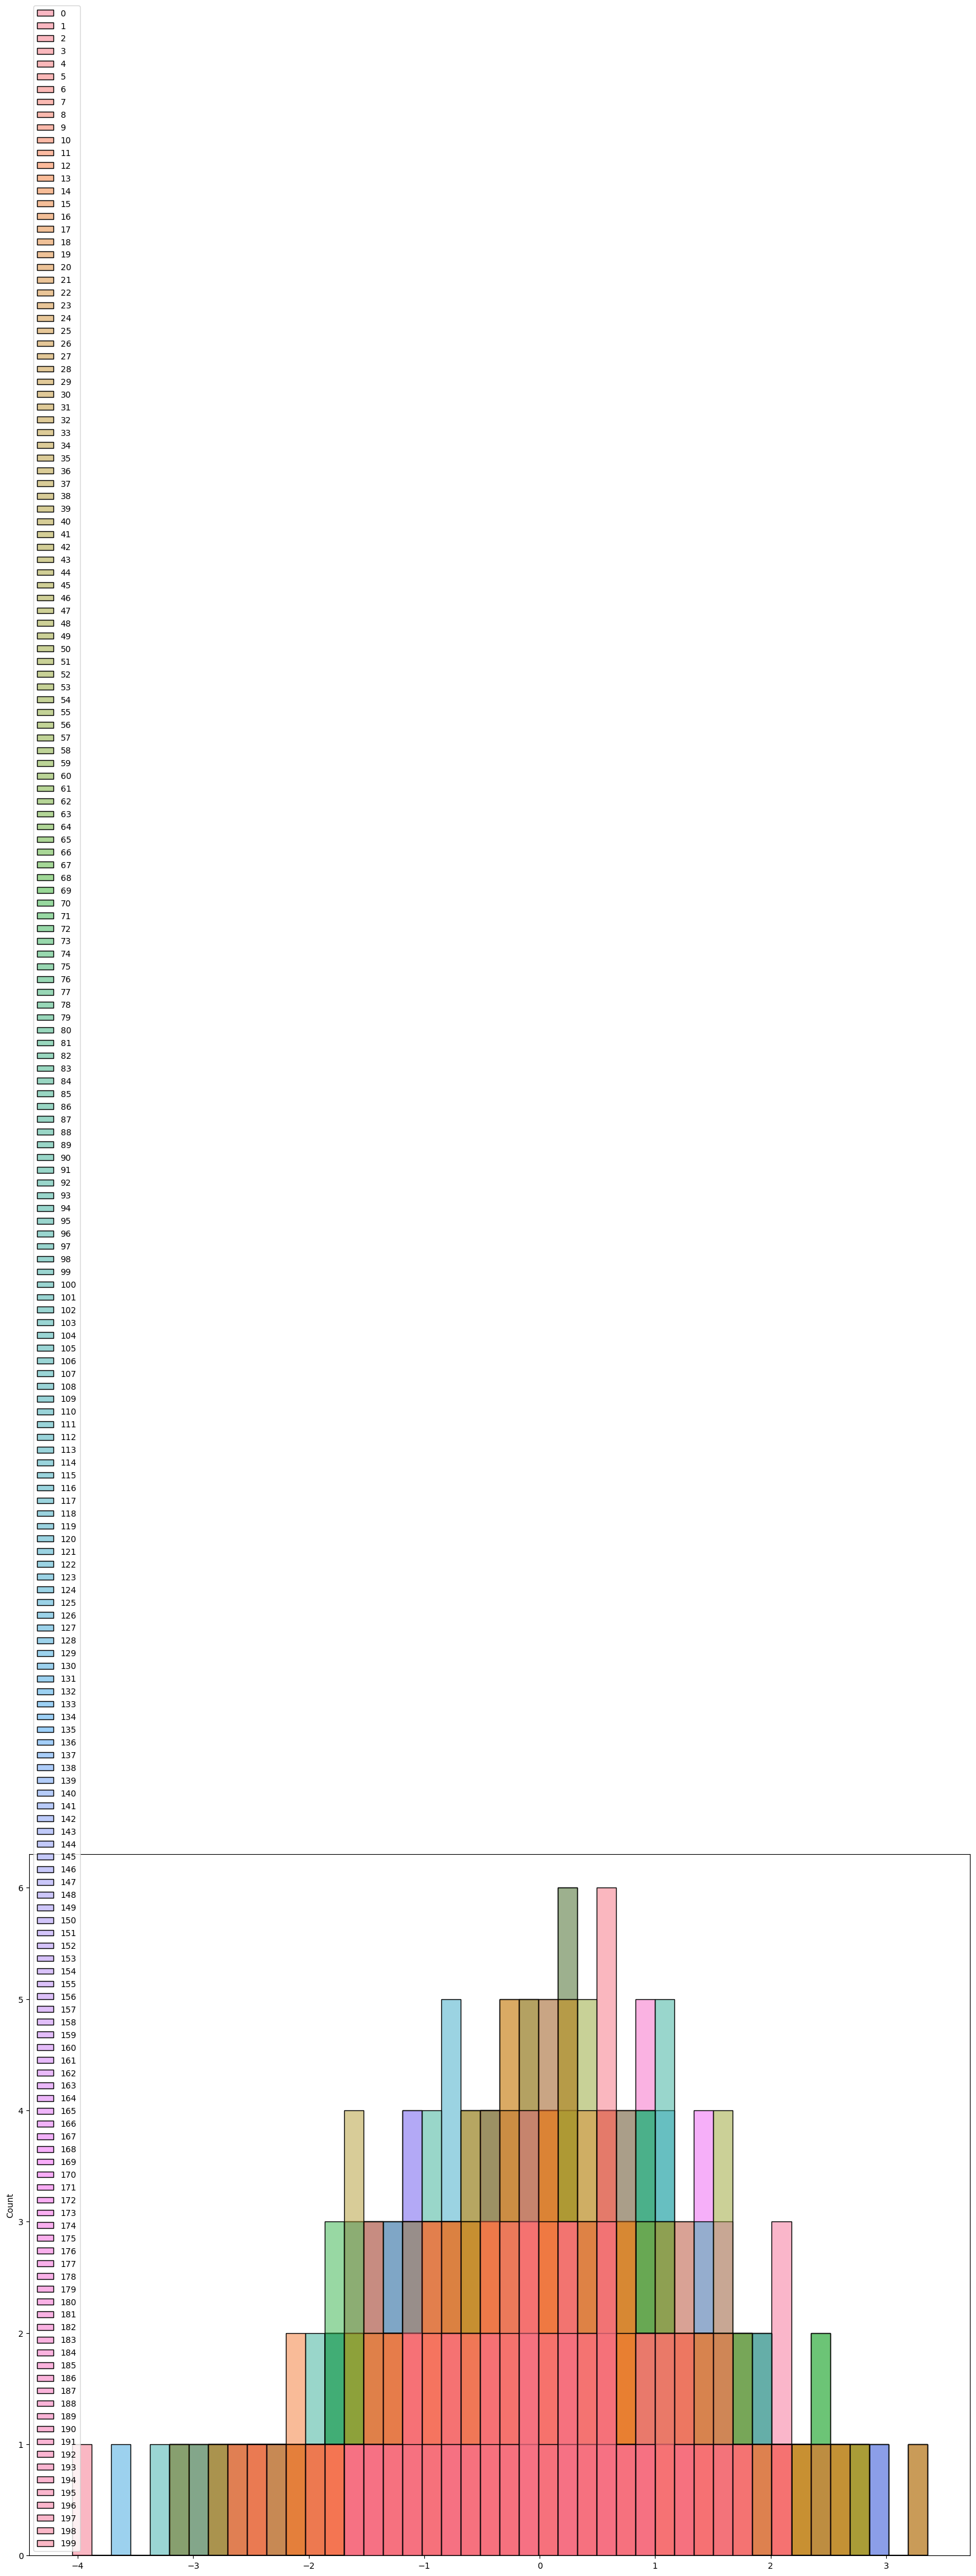

In [29]:
simulations = 200
Z = stats.norm.ppf(np.random.rand(days_prev_len, simulations))

plt.figure(figsize=(20, 15))
sns.histplot(Z)
plt.show()

In [30]:
def get_plot_simulation(predictions: list):
    fig = px.line(title = 'Monte Carlo Simulation')
    for i in range(len(predictions.T)):
        fig.add_scatter(y = predictions.T[i], name = i)
    fig.update_layout(paper_bgcolor='white', plot_bgcolor="white", font_color="black")
    fig.show()

df_std = prices_train_copy.std()
days_rt = np.exp(drift + df_std * Z)
days_pred = np.zeros_like(days_rt)
days_pred[0] = prices_train["Close"].iloc[-1]

for i in range(1, days_prev_len):
    days_pred[i] = days_pred[i - 1] * days_rt[i]
get_plot_simulation(days_pred)

In [31]:
s = days_pred.T[0][0:len(prices_test_copy)]

prices_test_copy = prices_test_copy[0:days_prev_len]
mean_absolute_error(prices_test_copy, s)

sqerror = list()
for i in range(len(days_pred.T)):
    sqerror.append(mean_absolute_error(prices_test_copy, days_pred.T[i][0:days_prev_len]))

In [32]:
def plot_best_predict(df: dict, index_max: int, index_min: int):
    fig = px.line(title='Predict Simulation - Monte Carlo', markers=True)
    fig.add_scatter(y=df, name='value')
    fig.add_scatter(y=days_pred.T[index_max], name='biggest pred error')
    fig.add_scatter(y=days_pred.T[index_min], name='smallest pred error')
    fig.update_traces(mode='markers+lines')
    fig.update_layout(paper_bgcolor='white', plot_bgcolor="white", font_color="black")
    fig.show()

index_min = np.argmin(sqerror)
index_max = np.argmax(sqerror)
plot_best_predict(prices_test_copy, index_max,  index_min)

In [33]:
for index, error in enumerate(sqerror):
    print(f"Simulation: {index} - error: {error}")

Simulation: 0 - error: 3.2360171420271167
Simulation: 1 - error: 5.975745151827077
Simulation: 2 - error: 2.603232731076698
Simulation: 3 - error: 2.5027394227463775
Simulation: 4 - error: 5.09825893010939
Simulation: 5 - error: 2.7455310744242816
Simulation: 6 - error: 8.840505930987884
Simulation: 7 - error: 6.289330657142535
Simulation: 8 - error: 8.801504793760207
Simulation: 9 - error: 4.960822502094612
Simulation: 10 - error: 5.6812181848725345
Simulation: 11 - error: 8.654925121252392
Simulation: 12 - error: 5.556113210965952
Simulation: 13 - error: 5.493227612062162
Simulation: 14 - error: 6.2805044328581
Simulation: 15 - error: 3.6616700066539316
Simulation: 16 - error: 7.814571881309308
Simulation: 17 - error: 4.8415344248892795
Simulation: 18 - error: 8.79536858899956
Simulation: 19 - error: 4.397483517194063
Simulation: 20 - error: 4.997505181385364
Simulation: 21 - error: 10.384618961583424
Simulation: 22 - error: 4.294179994002187
Simulation: 23 - error: 9.401395463724361

# **Profilling**

The starting and ending prices are almost the same. The variance is normal. Shares look stable.